# IIVP - Project 1
### 6252320 - Leon Debnath

Import the required modules for the notebook

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [66]:
def display(images, labels, axis='off', cmap=None, figsize=(15,10)):
    
    if len(images) != len(labels):
        raise Exception("images and labels don't correspond")
        
    fig = plt.figure(figsize=figsize)
    cols = 2
    rows = math.ceil(len(images)/2)
    
    for i in range(len(images)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(labels[i])
        plt.axis(axis)

## Exercise 1

## Exercise 2

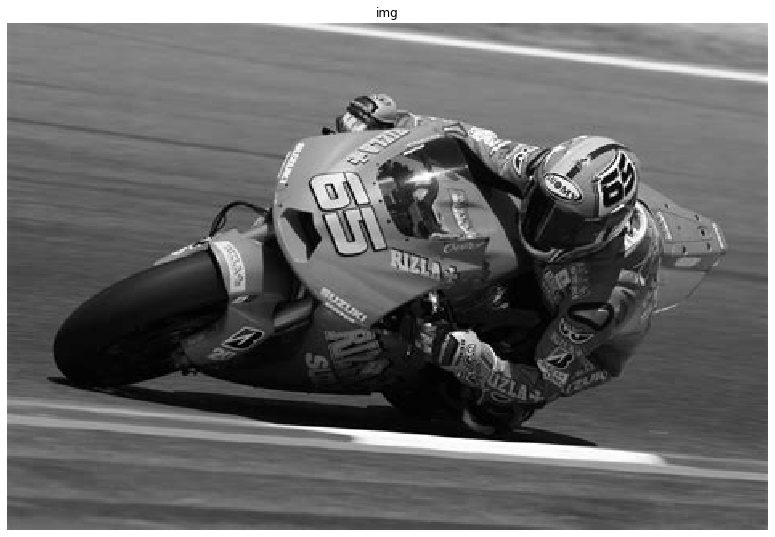

In [139]:
from scipy import fftpack
from numpy import pi
from numpy import r_

img = cv2.cvtColor(cv2.imread('images/motogp.jpeg'), cv2.COLOR_BGR2GRAY)

display([img],['img'], cmap='gray', figsize=(30,10))

In [142]:
def dct2(a):
    return fftpack.dct( fftpack.dct( a.T, norm='ortho' ).T, norm='ortho' )


def dct(img, block_size=8):
    
    dct = np.zeros(img.shape)

    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            dct[i: i + block_size, j: j + block_size] = dct2(img[i:i+ block_size, j: j+ block_size])
            
    return dct

In [143]:
def idct2(a):
    return fftpack.idct( fftpack.idct( a.T , norm='ortho').T,norm='ortho')        
        
def idct(dct, block_size=8):
    
    img = np.zeros(dct.shape)
    
    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            img[i:(i + block_size), j:(j + block_size)] = idct2( dct[i:(i + block_size),j:(j + block_size)] )

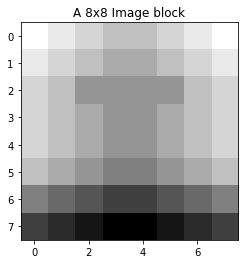

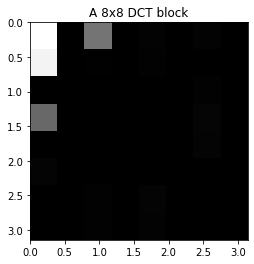

In [71]:
pos = 0

# Extract a block from image
plt.figure()
plt.imshow(img[pos: pos + block_size, pos: pos + block_size], cmap='gray')
plt.title(f"A {block_size}x{block_size} Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos: pos + block_size, pos: pos + block_size],
           cmap='gray',
           vmax=np.max(dct)*0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"A {block_size}x{block_size} DCT block");

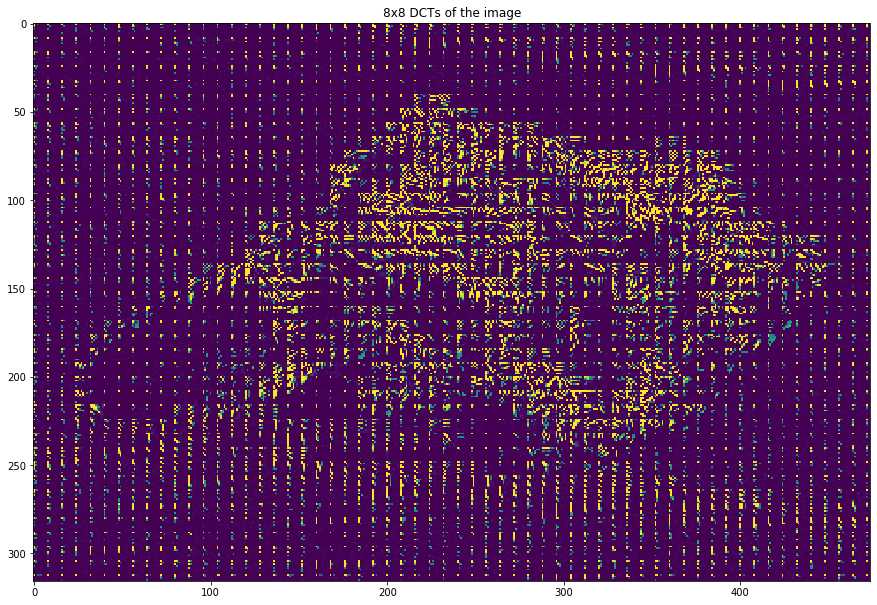

In [72]:
# Display entire DCT
plt.figure(figsize=(15,15))
plt.imshow(dct, vmax = np.max(dct)*0.01, vmin = 0)
plt.title( "8x8 DCTs of the image");

In [137]:
x = [x * 0.01 for x in range(1, 100)]
thresholds = {}
coeficients = {}

for key in x:
    thresholds[key] = dct * (abs(dct) > (key * np.max(dct)))
    coeficients[key] = 100 * np.sum(thresholds[key] != 0.0 ) / (img.shape[0] * img.shape[1] * 1.0)
    
    
# keys = list(thresholds.keys())
# imgs = list(thresholds.values())
# display(imgs, keys, cmap='gray', figsize=(15,25))

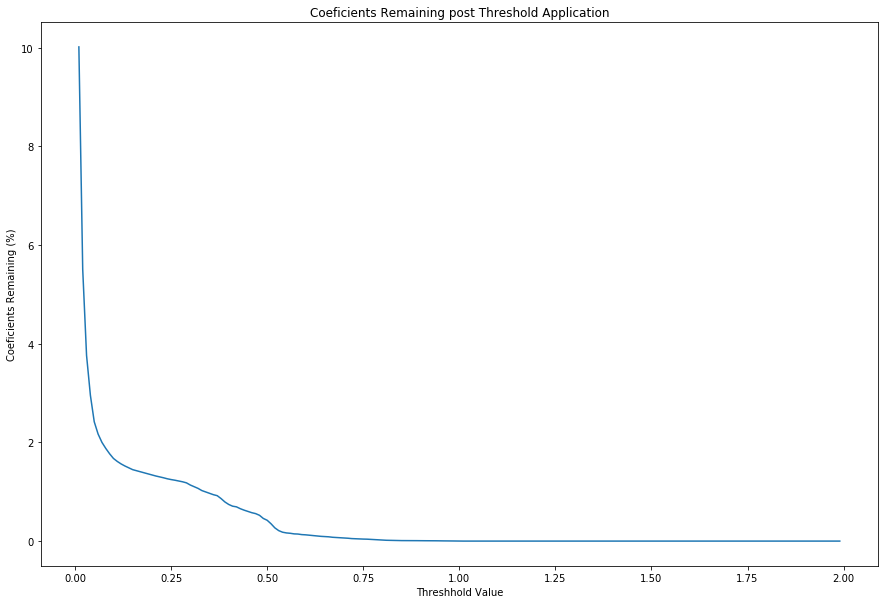

In [136]:
plt.figure(figsize=(15,10))
plt.plot(list(coeficients.keys()), list(coeficients.values()))
plt.title('Coeficients Remaining post Threshold Application')
plt.xlabel('Threshhold Value')
plt.ylabel('Coeficients Remaining (%)');

In [141]:
c_img = thresholds[0.75]



[[ 0.  0.  0. ... -0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [-0.  0. -0. ... -0.  0.  0.]
 ...
 [-0. -0. -0. ... -0. -0.  0.]
 [-0.  0.  0. ... -0. -0.  0.]
 [ 0.  0. -0. ... -0. -0.  0.]]
